# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
telco_data=pd.read_excel("Telco_customer_churn.xlsx")

# Data Preprocessing

In [3]:
telco_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
telco_data.shape

(7043, 33)

In [5]:
telco_data.describe

<bound method NDFrame.describe of       CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
7038  2569-WGERO      1  United States  California       Landers     92285   
7039  6840-RESVB      1  United States  California      Adelanto     92301   
7040  2234-XADUH      1  United States  California         Amboy     92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK      1  United States  California  Apple Valley     92308   

                    Lat Long 

In [6]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# Data Cleaning

In [7]:
telco_data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [8]:
telco_data.dropna(inplace=True)

In [9]:
telco_data.isnull().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64

In [10]:
telco_data.drop_duplicates(inplace=True)

In [11]:
telco_data.duplicated().sum()

0

In [16]:
# Drop unnecessary columns
telco_data.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis=1, inplace=True)

In [20]:
# Convert categorical columns to numerical
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoders = {}
for column in telco_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    telco_data[column] = label_encoders[column].fit_transform(telco_data[column])

In [22]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['Monthly Charges', 'Total Charges']
telco_data[numerical_cols] = scaler.fit_transform(telco_data[numerical_cols])

# Exploratory Data Analysis

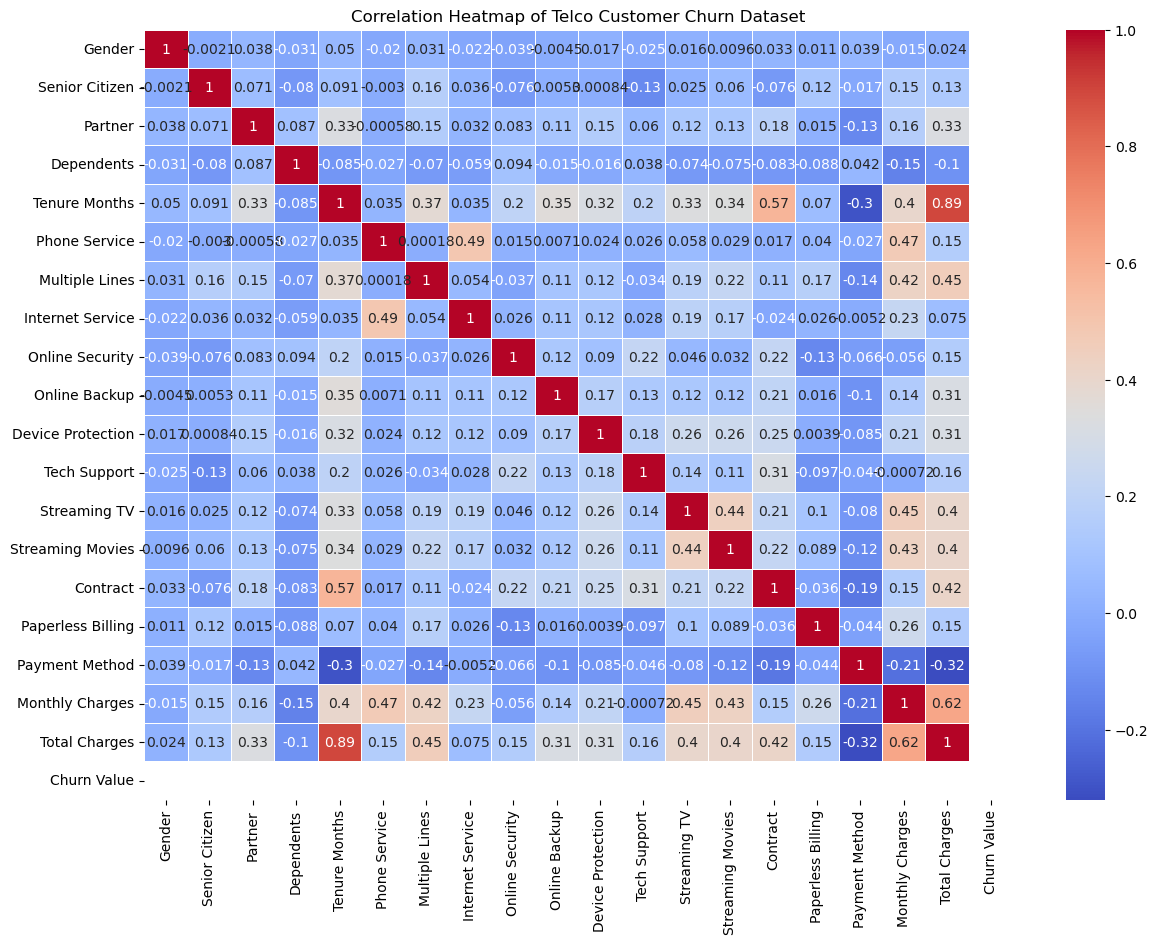

In [24]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(telco_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Telco Customer Churn Dataset')
plt.show()

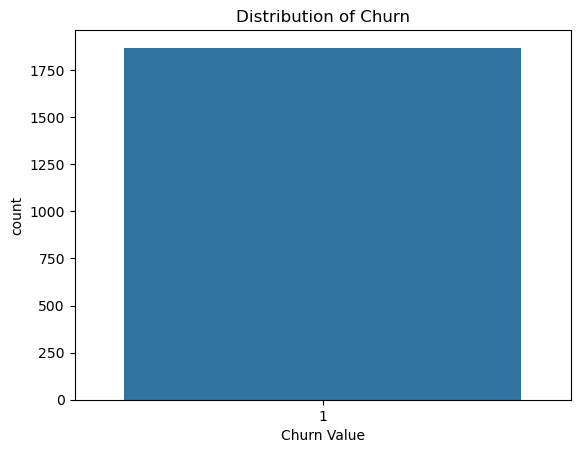

In [26]:
# Check the distribution of the target variable
sns.countplot(x='Churn Value', data=telco_data)
plt.title('Distribution of Churn')
plt.show()

In [30]:
# Identify numerical features present in the dataset
numerical_features = telco_data.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Features:", numerical_features)

Numerical Features: ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value']


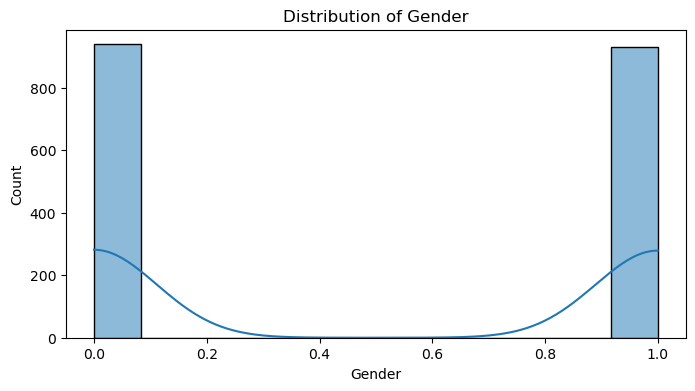

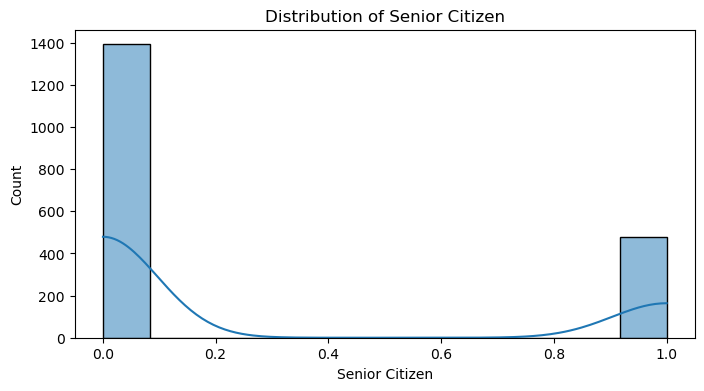

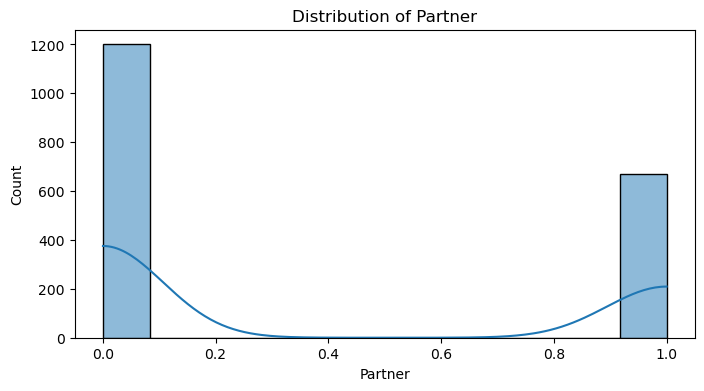

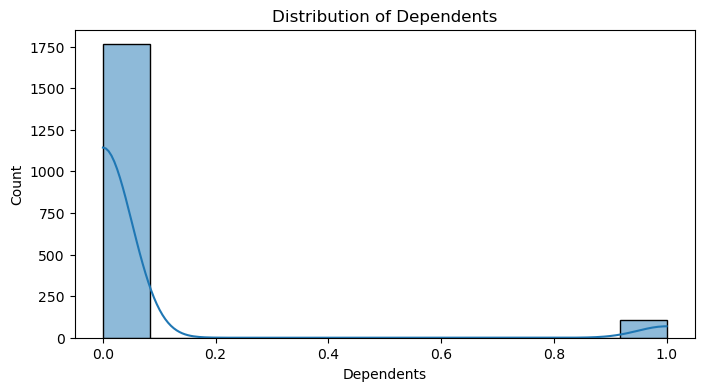

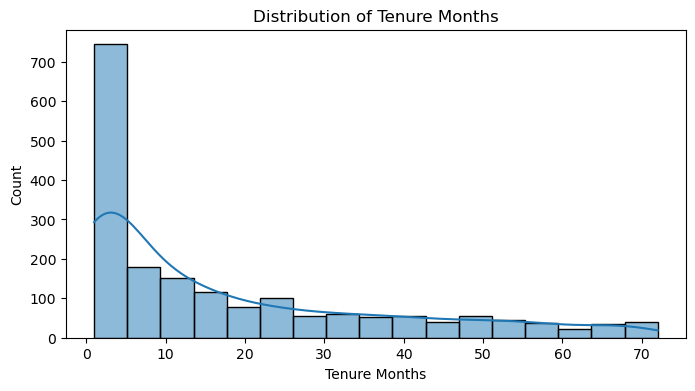

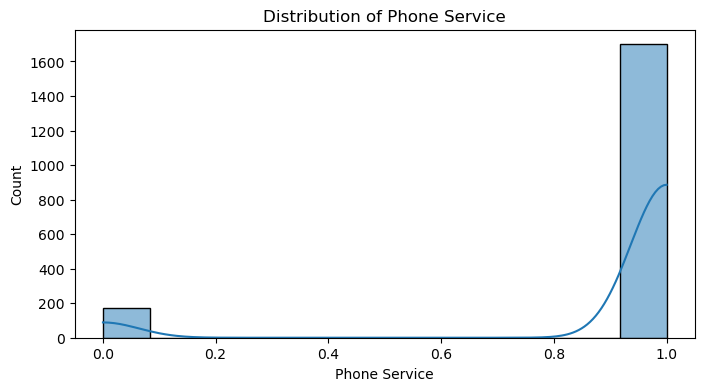

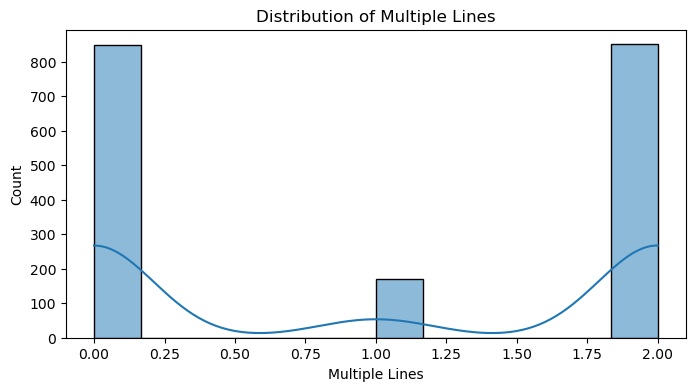

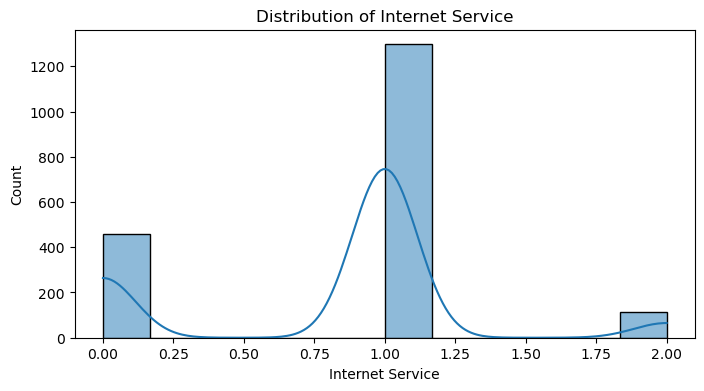

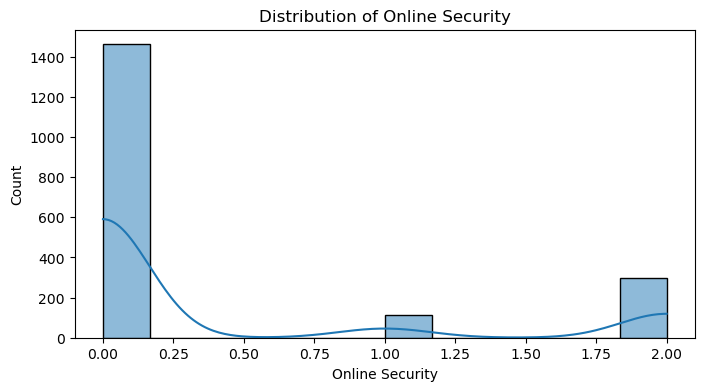

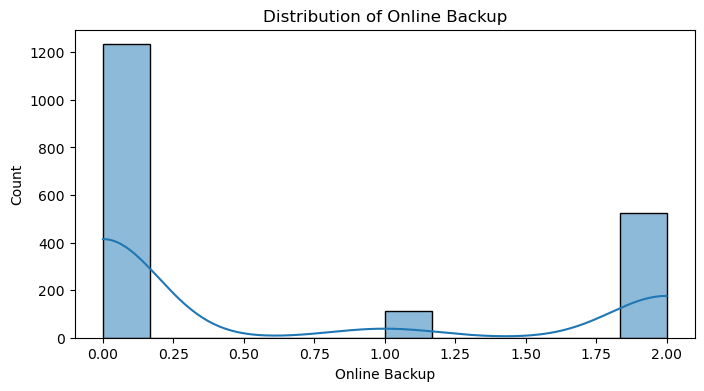

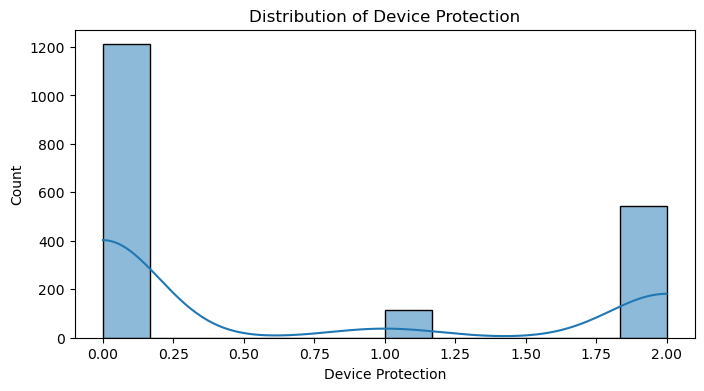

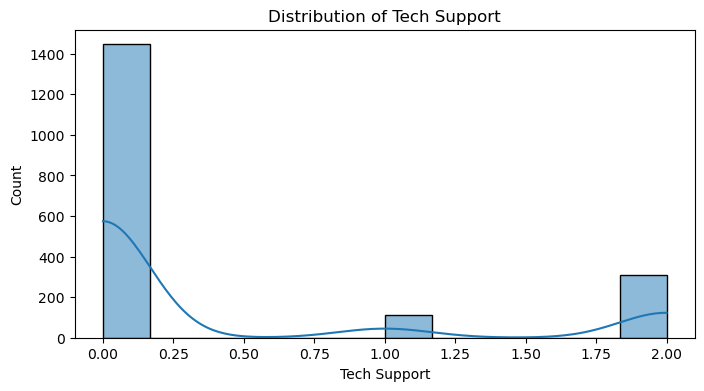

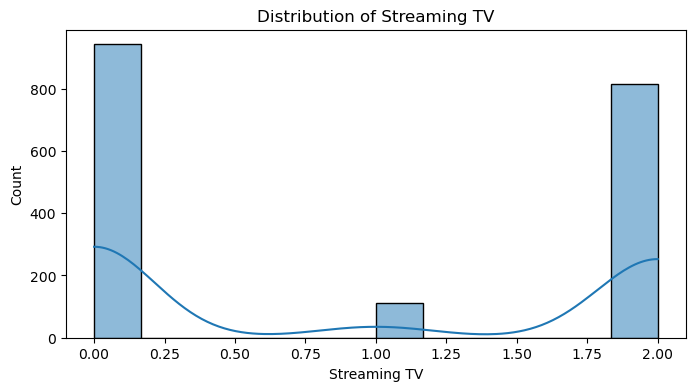

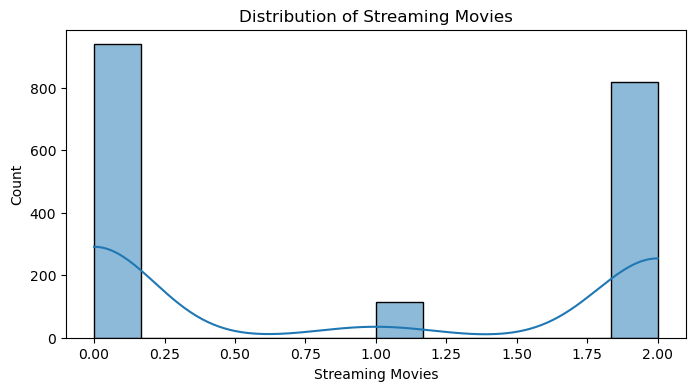

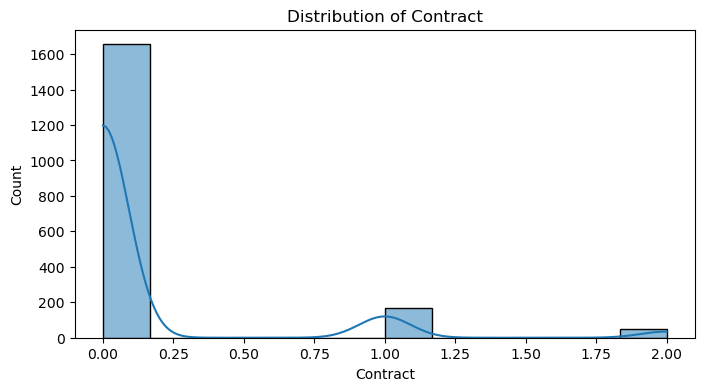

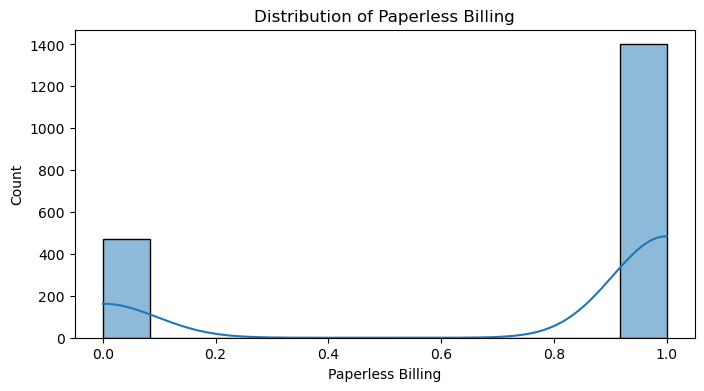

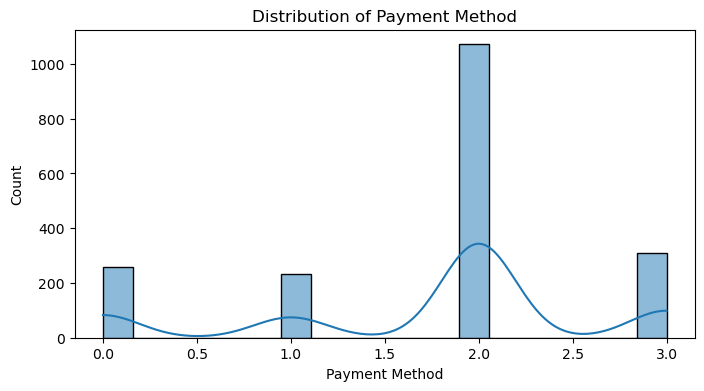

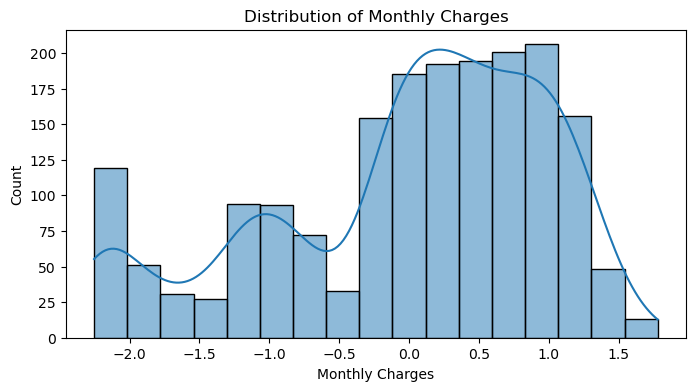

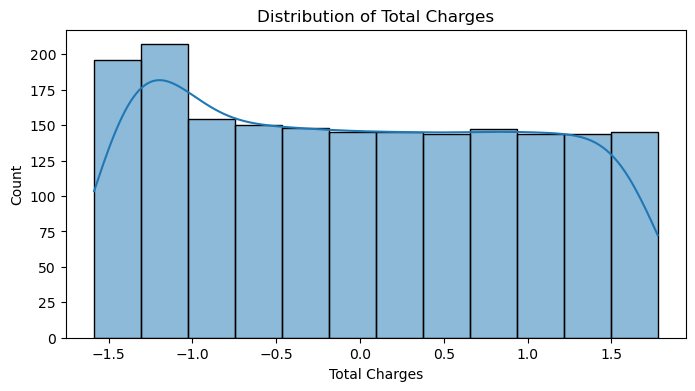

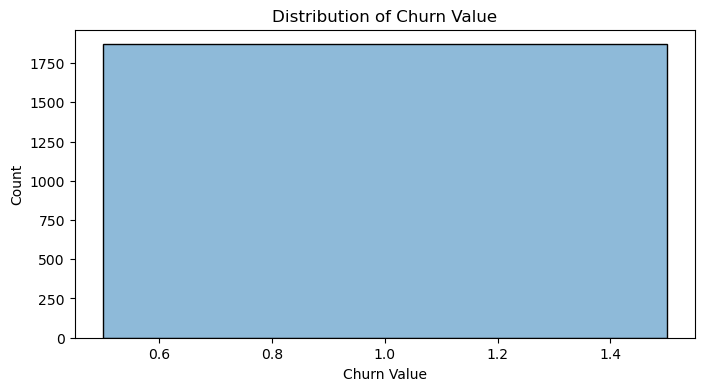

In [32]:
# Plot distribution of numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(telco_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Split the Dataset

In [34]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = telco_data.drop(['Churn Value'], axis=1)
y = telco_data['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model

In [36]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 1.0
Confusion Matrix:
 [[374]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       374

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374



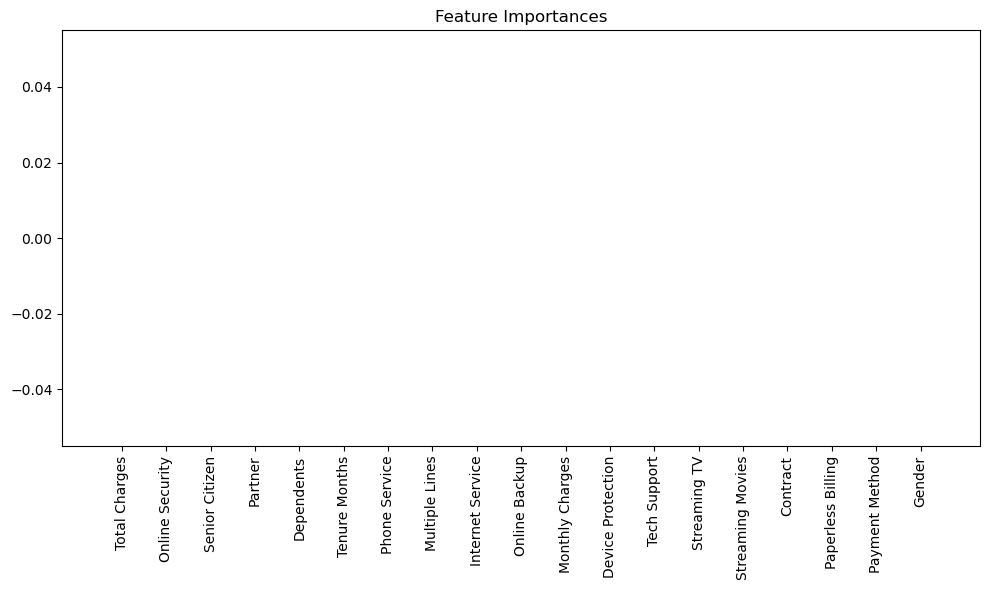

In [40]:
# Plot the feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()